<a href="https://colab.research.google.com/github/Hiruna-Kumara/Background_and_Ruled_Line_Noise_Removal_for_SL_NIC/blob/main/Code/AutoEncoder/Updated_Auto_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'

if 'COLAB_TPU_ADDR' in os.environ:
  TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
else:
  TF_MASTER=''

tpu_address = TF_MASTER

In [ ]:
import tensorflow as tf
# %tensorflow_version 2.2.0
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu_address)
tf.config.experimental_connect_to_cluster(resolver)

tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))
print("Number of devices: ", len(tf.config.list_logical_devices('TPU')))

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.86.34.202:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.86.34.202:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]
Number of devices:  8


In [ ]:
strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import os
import numpy as np

len(os.listdir('/content/gdrive/MyDrive/new_nic_cropped_grayscaled_5000_glare_removed/'))

5500

In [ ]:
def read_this(image_file, gray_scale=False):
    image_src = cv2.imread('/content/gdrive/MyDrive/new_nic_cropped_grayscaled_5000_glare_removed/' + image_file)
    image_src = cv2.resize(image_src, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
    if gray_scale:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2GRAY)
    else:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2RGB)
    return image_src

In [ ]:
def binarize_lib(image_file, thresh_val=127, with_plot=False, gray_scale=False):
    image_src = read_this(image_file=image_file, gray_scale=gray_scale)
    th, image_b = cv2.threshold(src=image_src, thresh=thresh_val, maxval=255, type=cv2.THRESH_BINARY)
    if with_plot:
        cmap_val = None if not gray_scale else 'gray'
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
        
        ax1.axis("off")
        ax1.title.set_text('Original')
        
        ax2.axis("off")
        ax2.title.set_text("Binarized")
        
        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_b, cmap=cmap_val)
        return True
    return image_b

In [ ]:
import cv2
import random

folder_name = os.listdir('/content/gdrive/MyDrive/new_nic_cropped_grayscaled_5000_glare_removed/')
X = list()
y = list()
for i in range(len(folder_name)):
  # img = cv2.imread('/content/gdrive/MyDrive/glarer_emoved_and_binarized_images/'+folder_name[i])
  # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # img = cv2.resize(img, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
  img = binarize_lib(image_file=folder_name[i], with_plot=False, gray_scale=True)
  img_ = img.astype('float32')
  # y_img = normalize(img_)
  # y.append(y_img)
  # noisy = normalize(add_gaussian_noise(img_))
  X.append(img_)

In [ ]:
test_X = list()
for i in range(len(X)):
  if (i == 431):
    break
  else:
    test_X.append(X[i])
    X.pop(i)

In [ ]:
train_X = X 
# train_y = y

train_X = np.array(train_X)

In [ ]:
test_X = np.array(test_X)

In [ ]:

print("train_X shape: ", train_X.shape)
print("test_X shape: ", test_X.shape)


train_X shape:  (5069, 128, 128)
test_X shape:  (431, 128, 128)


In [ ]:
def read_this_input_to_fuzzy(image_file, gray_scale=False):
    image_src = cv2.imread('/content/gdrive/MyDrive/new_nic_cropped_grayscaled_5000_glare_removed/' + image_file)
    image_src = cv2.resize(image_src, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
    if gray_scale:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2GRAY)
    else:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2RGB)
    return image_src

In [ ]:
def binarize_lib_input_to_fuzzy(image_file, thresh_val=127, with_plot=False, gray_scale=False):
    image_src = read_this_input_to_fuzzy(image_file=image_file, gray_scale=gray_scale)
    th, image_b = cv2.threshold(src=image_src, thresh=thresh_val, maxval=255, type=cv2.THRESH_BINARY)
    if with_plot:
        cmap_val = None if not gray_scale else 'gray'
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
        
        ax1.axis("off")
        ax1.title.set_text('Original')
        
        ax2.axis("off")
        ax2.title.set_text("Binarized")
        
        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_b, cmap=cmap_val)
        return True
    return image_b

In [ ]:
# test_y_input_to_fuzzy = list()
# for i in range(len(y_input_to_fuzzy)):  ## y means noise less images
#   if (i == 431):
#     break
#   else:
#     test_y_input_to_fuzzy.append(y_input_to_fuzzy[i])
#     y_input_to_fuzzy.pop(i)

In [ ]:
# train_input_to_fuzzy = y_input_to_fuzzy

# test_input_to_fuzzy = test_y_input_to_fuzzy


# train_input_to_fuzzy = np.array(train_input_to_fuzzy)
# test_input_to_fuzzy = np.array(test_input_to_fuzzy)

In [ ]:
print("train_X shape: ", train_X.shape)
print("test_X shape: ", test_X.shape)

# print("train_input_to_fuzzy: ", train_input_to_fuzzy.shape)
# print("test_input_to_fuzzy", test_input_to_fuzzy.shape)

train_X shape:  (5069, 128, 128)
test_X shape:  (431, 128, 128)


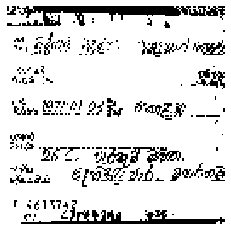

(128, 128)
(5069, 128, 128)


In [ ]:
from matplotlib import pyplot as plt
img_f = test_X[0]
plt.axis("off")
plt.imshow(cv2.cvtColor(img_f, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.show()

print(img_f.shape)
print(train_X.shape)

In [ ]:
# from matplotlib import pyplot as plt
# img_f = test_input_to_fuzzy[0]
# plt.axis("off")
# plt.imshow(cv2.cvtColor(img_f, cv2.COLOR_BGR2RGB), interpolation='nearest')
# plt.show()

# print(img_f.shape)
# print(train_X.shape)

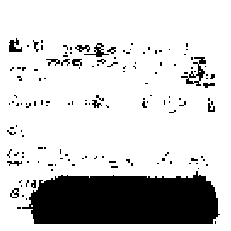

(128, 128)
(5069, 128, 128)


In [ ]:
# from matplotlib import pyplot as plt
img_f = train_X[1]
plt.axis("off")
plt.imshow(cv2.cvtColor(img_f, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.show()

print(img_f.shape)
print(train_X.shape)

In [ ]:
# img_f =train_input_to_fuzzy[1]
# plt.axis("off")
# plt.imshow(cv2.cvtColor(img_f, cv2.COLOR_BGR2RGB), interpolation='nearest')
# plt.show()

# print(img_f.shape)
# print(train_input_to_fuzzy.shape)

In [ ]:
# img_f =test_input_to_fuzzy[0]
# plt.axis("off")
# plt.imshow(cv2.cvtColor(img_f, cv2.COLOR_BGR2RGB), interpolation='nearest')
# plt.show()

# print(img_f.shape)
# print(train_input_to_fuzzy.shape)

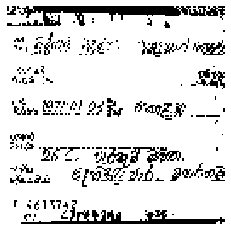

(128, 128)


In [ ]:
img_f = test_X[0]
plt.axis("off")
plt.imshow(cv2.cvtColor(img_f, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.show()

print(img_f.shape)
# print(train_input_to_fuzzy.shape)

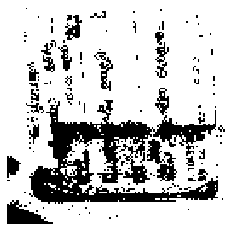

(128, 128)


In [ ]:
img_f =test_X[2]
plt.axis("off")
plt.imshow(cv2.cvtColor(img_f, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.show()

print(img_f.shape)
# print(train_input_to_fuzzy.shape)

In [ ]:
import numpy 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist

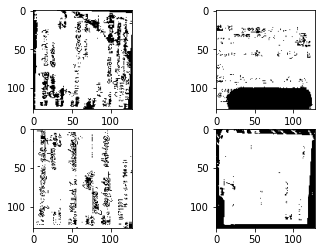

In [ ]:
plt.subplot(221)
plt.imshow(train_X[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(train_X[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(train_X[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(train_X[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [ ]:
# train_X = train_X.astype('float32') / 255.
# test_X = test_X.astype('float32') / 255.
# train_X = np.reshape(train_X, (len(train_X), 150, 150, 1))  # adapt this if using `channels_first` image data format
# test_X = np.reshape(test_X, (len(test_X), 150, 150, 1))


train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0
# train_X = train_X.reshape((len(train_X), np.prod(train_X.shape[1:])))
# test_X = test_X.reshape((len(test_X), np.prod(test_X.shape[1:])))

train_X = np.reshape(train_X, (len(train_X), 128, 128, 1))
test_X = np.reshape(test_X, (len(test_X), 128, 128, 1))


# train_input_to_fuzzy = train_input_to_fuzzy.astype('float32')/255.0
# test_input_to_fuzzy = test_input_to_fuzzy.astype('float32')/255.0 



# train_input_to_fuzzy = np.reshape(train_input_to_fuzzy, (len(train_input_to_fuzzy), 128, 128, 1))
# test_input_to_fuzzy = np.reshape(test_input_to_fuzzy, (len(test_input_to_fuzzy), 128, 128, 1))

In [ ]:
print(train_X.shape)
print(test_X.shape)

# print("train_input_to_fuzzy: ", train_input_to_fuzzy.shape)
# print("test_input_to_fuzzy", test_input_to_fuzzy.shape)

(5069, 128, 128, 1)
(431, 128, 128, 1)


In [ ]:
noise_factor = 0.2
x_train_noisy = train_X + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=train_X.shape)
x_test_noisy = test_X + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=test_X.shape)
x_train_noisy = numpy.clip(x_train_noisy, 0., 1.)
x_test_noisy = numpy.clip(x_test_noisy, 0., 1.)


# train_X_input_to_fuzzy = train_input_to_fuzzy + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_input_to_fuzzy.shape)
# test_X_input_to_fuzzy = test_input_to_fuzzy + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_input_to_fuzzy.shape)

# train_X_input_to_fuzzy = np.clip(train_X_input_to_fuzzy, 0., 1.)
# test_X_input_to_fuzzy = np.clip(test_X_input_to_fuzzy, 0., 1.)

In [ ]:

print("x_train_noisy", x_train_noisy.shape)
print("x_test_noisy", x_test_noisy.shape)
# print("train_X_input_to_fuzzy: ",train_X_input_to_fuzzy.shape)
# print("test_X_input_to_fuzzy: ",test_X_input_to_fuzzy.shape)

x_train_noisy (5069, 128, 128, 1)
x_test_noisy (431, 128, 128, 1)


In [ ]:
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback, TensorBoard
from tensorflow.keras.utils import to_categorical

In [ ]:
# create the encoder network
input_image = Input(shape=(128, 128,1))
x = Conv2D(32,(3,3),activation='relu',padding='same')(input_image)
x = MaxPooling2D((2,2),padding='same')(x)
x = Conv2D(32,(3,3),activation='relu',padding='same')(x)
encoded = MaxPooling2D((2,2),padding='same')(x)

encoder = Model(input_image, encoded)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
Total params: 9,568
Trainable params: 9,568
Non-trainable par

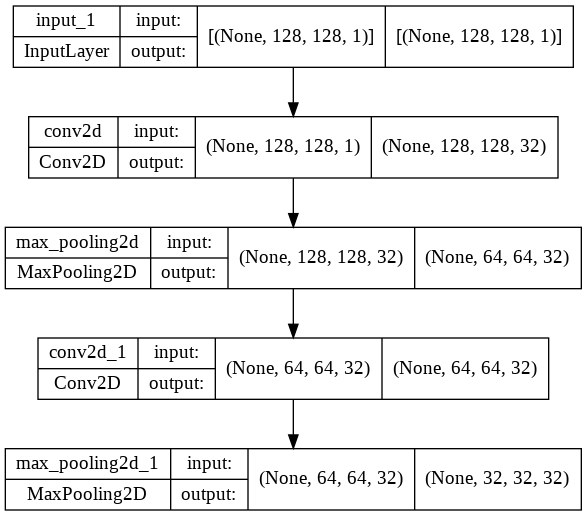

In [ ]:
tf.keras.utils.plot_model(encoder, show_shapes=True)

In [ ]:
# create the decoder network
decoder_input= Input(shape=(32,32,32))
x = Conv2D(32,(3,3),activation='relu',padding='same')(decoder_input)
x = UpSampling2D((2,2))(x)
x = Conv2D(32,(3,3),activation='relu',padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

decoder = Model(decoder_input, decoded)
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 32)]      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 up_sampling2d (UpSampling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 up_sampling2d_1 (UpSampling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 1)       289 

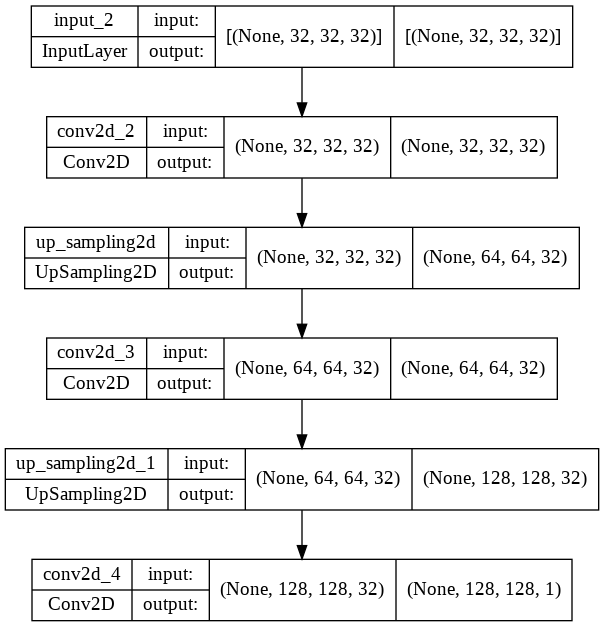

In [ ]:
tf.keras.utils.plot_model(decoder, show_shapes=True)

In [ ]:
# create the autoencoder by tying the encode and decode networks together
autoencoder_input = Input(shape=(128, 128,1))
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)
autoencoder = Model(autoencoder_input, decoded)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 model (Functional)          (None, 32, 32, 32)        9568      
                                                                 
 model_1 (Functional)        (None, 128, 128, 1)       18785     
                                                                 
Total params: 28,353
Trainable params: 28,353
Non-trainable params: 0
_________________________________________________________________


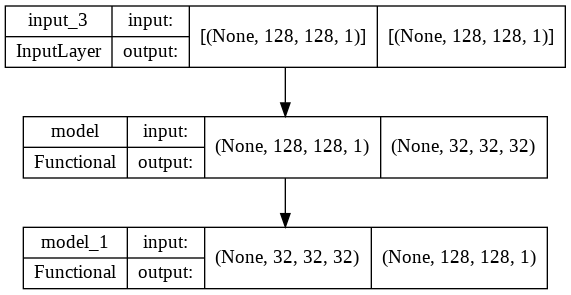

In [ ]:
tf.keras.utils.plot_model(autoencoder, show_shapes=True)

In [ ]:
# train using the noisy images with their clean counterparts
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, train_X,
  epochs=300,
  batch_size=128,
  shuffle=True)

Epoch 1/300
40/40 [==============================] - 37s 889ms/step - loss: 0.3330
Epoch 2/300
40/40 [==============================] - 36s 912ms/step - loss: 0.2092
Epoch 3/300
40/40 [==============================] - 36s 898ms/step - loss: 0.1738
Epoch 4/300
40/40 [==============================] - 36s 891ms/step - loss: 0.1587
Epoch 5/300
40/40 [==============================] - 36s 903ms/step - loss: 0.1508
Epoch 6/300
40/40 [==============================] - 36s 900ms/step - loss: 0.1452
Epoch 7/300
40/40 [==============================] - 36s 893ms/step - loss: 0.1409
Epoch 8/300
40/40 [==============================] - 35s 878ms/step - loss: 0.1378
Epoch 9/300
40/40 [==============================] - 36s 892ms/step - loss: 0.1339
Epoch 10/300
40/40 [==============================] - 36s 900ms/step - loss: 0.1308
Epoch 11/300
40/40 [==============================] - 36s 903ms/step - loss: 0.1282
Epoch 12/300
40/40 [==============================] - 36s 911ms/step - loss: 0.1256
E

In [ ]:
autoencoder.get_config()

{'input_layers': [['input_3', 0, 0]],
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 128, 128, 1),
    'dtype': 'float32',
    'name': 'input_3',
    'ragged': False,
    'sparse': False},
   'inbound_nodes': [],
   'name': 'input_3'},
  {'class_name': 'Functional',
   'config': {'input_layers': [['input_1', 0, 0]],
    'layers': [{'class_name': 'InputLayer',
      'config': {'batch_input_shape': (None, 128, 128, 1),
       'dtype': 'float32',
       'name': 'input_1',
       'ragged': False,
       'sparse': False},
      'inbound_nodes': [],
      'name': 'input_1'},
     {'class_name': 'Conv2D',
      'config': {'activation': 'relu',
       'activity_regularizer': None,
       'bias_constraint': None,
       'bias_initializer': {'class_name': 'Zeros', 'config': {}},
       'bias_regularizer': None,
       'data_format': 'channels_last',
       'dilation_rate': (1, 1),
       'dtype': 'float32',
       'filters': 32,
       'groups': 1,
       'ker

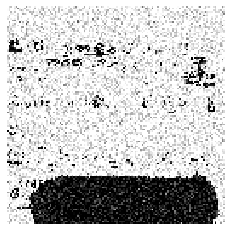

(128, 128, 1)


In [ ]:
img_f = x_train_noisy[1]
plt.axis("off")
z = np.squeeze(img_f, axis=2)

img_float32 = np.float32(z)
plt.imshow(cv2.cvtColor( img_float32, cv2.COLOR_BGR2RGB), interpolation='nearest')
# plt.imshow(cv2.cvtColor(img_f, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.show()

print(img_f.shape)
# print(train_input_to_fuzzy.shape)

In [ ]:
# run the first 10 noisy test images through the encoder
encoded_imgs = encoder.predict(x_test_noisy)
print(encoded_imgs.shape)

# run encoded noisy test images back through the decoder
decoded_imgs = decoder.predict(encoded_imgs)
print(decoded_imgs.shape)

(431, 32, 32, 32)
(431, 128, 128, 1)


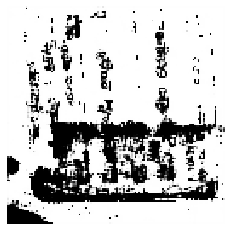

(128, 128, 1)


In [ ]:
img_f = decoded_imgs[2]
plt.axis("off")
plt.imshow(cv2.cvtColor(img_f, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.show()

print(img_f.shape)
# print(train_input_to_fuzzy.shape)

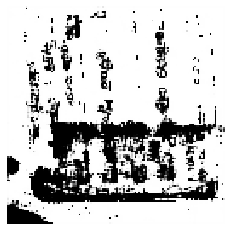

(128, 128, 1)


In [ ]:
# img_f = test_input_to_fuzzy[2]
plt.axis("off")
plt.imshow(cv2.cvtColor(img_f, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.show()

print(img_f.shape)
# print(train_input_to_fuzzy.shape)

In [ ]:
rmse_list = []
psnr_list = []

In [ ]:
def mse(x1, x2, norm=2):
    return tf.reduce_mean(tf.square((x1 - x2) / norm))

In [ ]:
def rmse(x1, x2, norm=2):
    return tf.sqrt(mse(x1, x2, norm))

In [ ]:
def psnr(x1, x2, max_diff=1):
    return 20. * tf.math.log(max_diff / rmse(x1, x2)) / tf.math.log(10.)

In [ ]:
for j in range(len(decoded_imgs)):
    rmse_ = rmse(test_X[j], decoded_imgs[j], norm=2)
    psnr_ = psnr(test_X[j], decoded_imgs[j], max_diff=1)

    rmse_list.append(rmse_)
    psnr_list.append(psnr_)

In [ ]:
rmse_array = np.array(rmse_list)
psnr_array = np.array(psnr_list)

In [ ]:
print("mean of rmse: ", np.mean(rmse_array))
print("mean of psnr: ", np.mean(psnr_array))

mean of rmse:  0.054449487
mean of psnr:  25.600117


In [ ]:
print("standard deviation of rmse: ", np.std(rmse_array))
print("standard deviation of psnr: ", np.std(psnr_array))

standard deviation of rmse:  0.014174638
standard deviation of psnr:  2.450022


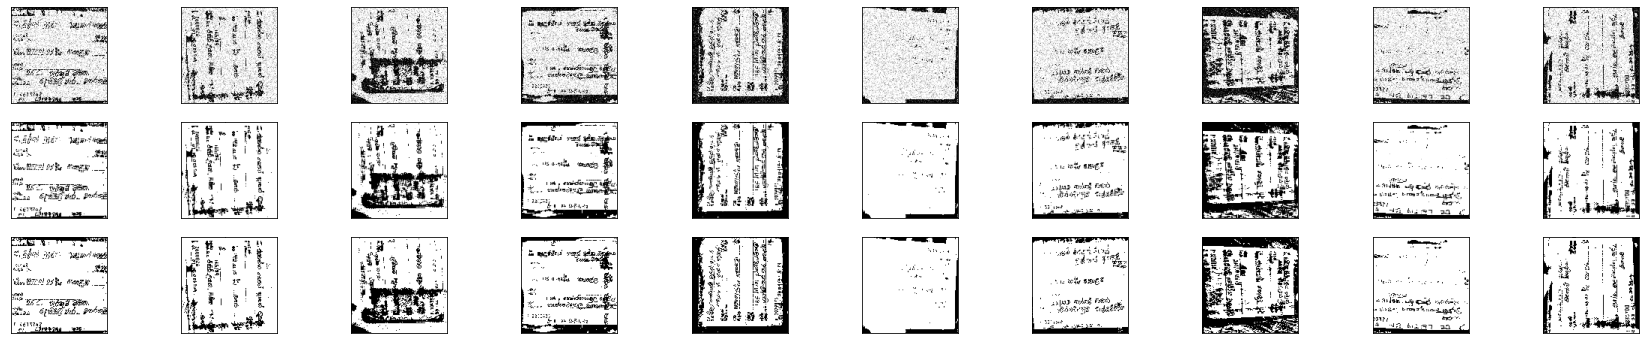

In [ ]:
# display the images
n = 10
plt.figure(figsize=(30,6))
for i in range(n):
  # noisy images
  ax = plt.subplot(3,n,i+1)
  plt.imshow(x_test_noisy[i].reshape(128,128))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # denoised images
  ax = plt.subplot(3,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(128,128))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # original images
  ax = plt.subplot(3,n,i+1+n*2)
  plt.imshow(test_X[i].reshape(128,128))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
loss_train = history.history['train_loss']
loss_val = history.history['val_loss']
epochs = range(1,35)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()